### **Data Cleaning**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("C:\\Users\\ACER\\Downloads\\archive (18)\\forestfires.csv")

# Display the first few rows of the dataset
data.head(10)


,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,area
0,3,6,sep,mon,90.9,126.5,686.5,7.0,15.6,66,3.1,0.00
1,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.36
2,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.43
3,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.47
4,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.55
5,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.61
6,1,2,jul,sat,90.0,51.3,296.3,8.7,16.6,53,5.4,0.71
7,2,5,aug,wed,95.5,99.9,513.3,13.2,23.8,32,5.4,0.77
8,6,5,aug,thu,95.2,131.7,578.8,10.4,27.4,22,4.0,0.90
9,5,4,mar,mon,90.1,39.7,86.6,6.2,13.2,40,5.4,0.95


In [2]:
print (data.shape)

(378, 12)


In [3]:

# Display basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       378 non-null    int64  
 1   y       378 non-null    int64  
 2   month   378 non-null    object 
 3   day     378 non-null    object 
 4   ffmc    378 non-null    float64
 5   dmc     378 non-null    float64
 6   dc      378 non-null    float64
 7   isi     378 non-null    float64
 8   temp    378 non-null    float64
 9   rh      378 non-null    int64  
 10  wind    378 non-null    float64
 11  area    378 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 35.6+ KB


#### **Missing Values Check**

In [4]:

# Check for missing values
data.isnull().sum()



x        0
y        0
month    0
day      0
ffmc     0
dmc      0
dc       0
isi      0
temp     0
rh       0
wind     0
area     0
dtype: int64

In [5]:

# Summary statistics
data.describe()

,x,y,ffmc,dmc,dc,isi,temp,rh,wind,area
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,4.772487,4.373016,90.776720,120.739418,568.447090,9.110582,19.318254,44.976190,4.001323,12.711455
std,2.370483,1.168105,5.877123,67.226967,237.356752,4.091395,6.077921,16.335571,1.845325,31.253799
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,90.500000,84.250000,468.450000,6.800000,15.925000,33.000000,2.700000,0.000000
50%,5.000000,4.000000,91.700000,115.400000,666.700000,8.400000,19.900000,42.000000,4.000000,2.540000
75%,7.000000,5.000000,93.100000,157.300000,731.425000,11.400000,23.400000,54.750000,4.900000,9.912500
max,9.000000,9.000000,96.200000,291.300000,860.600000,22.700000,33.300000,100.000000,9.400000,278.530000


##### **Scaling of the features**

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
minmax = MinMaxScaler()

# Apply MinMaxScaler to multiple columns at once
columns_to_scale = ['ffmc', 'dmc', 'dc', 'isi', 'rh']
data[columns_to_scale] = minmax.fit_transform(data[columns_to_scale])

# Display the scaled data
print(data.head())

   x  y month  day      ffmc       dmc        dc       isi  temp        rh  \
0  3  6   sep  mon  0.931613  0.432116  0.795825  0.308370  15.6  0.600000   
1  9  9   jul  tue  0.865806  0.162646  0.358274  0.171806  18.0  0.317647   
2  1  4   sep  tue  0.932903  0.442453  0.802979  0.308370  21.7  0.270588   
3  2  5   sep  mon  0.931613  0.432116  0.795825  0.308370  21.9  0.282353   
4  1  2   aug  wed  0.990968  0.340455  0.592706  0.581498  23.3  0.188235   

   wind  area  
0   3.1  0.00  
1   2.7  0.36  
2   2.2  0.43  
3   1.8  0.47  
4   4.5  0.55  


##### **Outlier Analysis**

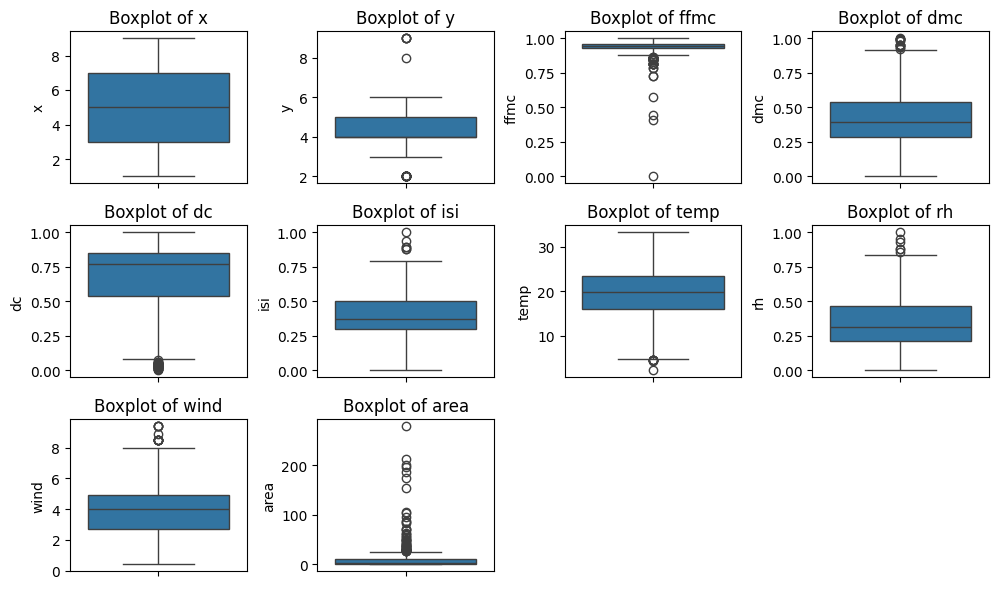

x        0
y       27
ffmc    41
dmc     14
dc      30
isi      6
temp     8
rh       6
wind    13
area    50
dtype: int64


In [7]:
# Visualizing outliers using box plots for each numeric variable
plt.figure(figsize=(10, 6))
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Detecting outliers using the IQR method
outliers = pd.DataFrame()

for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = ((data[col] < lower_bound) | (data[col] > upper_bound))

# Display the count of outliers in each column
outliers_sum = outliers.sum()
print(outliers_sum)


In [8]:
import numpy as np

# Define custom capping thresholds for each variable
cap_thresholds = {
    'x': (0.10, 0.90),
    'y': (0.10, 0.90),
    'ffmc': (0.05, 0.95),
    'dmc': (0.05, 0.95),
    'dc': (0.10, 0.90),
    'isi': (0.05, 0.95),
    'temp': (0.10, 0.90),
    'rh': (0.10, 0.90),
    'wind': (0.10, 0.90),
    'area': (0.05, 0.95)
}

# Copy the original data to avoid modifying it directly
data_capped = data.copy()

# Loop through each column, applying individual capping thresholds
for col in cap_thresholds:
    lower_cap, upper_cap = np.percentile(data_capped[col], [cap_thresholds[col][0]*100, cap_thresholds[col][1]*100])
    data_capped[col] = np.clip(data_capped[col], lower_cap, upper_cap)

# Display the shape of the capped dataset
print(f"Original data shape: {data.shape}")
print(f"Capped data shape: {data_capped.shape}")

# Display the first few rows of the capped dataset
data_capped.head()


Original data shape: (378, 12)
Capped data shape: (378, 12)


,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,area
0,3,6,sep,mon,0.931613,0.432116,0.795825,0.308370,15.6,0.600000,3.1,0.00
1,8,6,jul,tue,0.865806,0.162646,0.358274,0.171806,18.0,0.317647,2.7,0.36
2,2,4,sep,tue,0.932903,0.442453,0.802979,0.308370,21.7,0.270588,2.2,0.43
3,2,5,sep,mon,0.931613,0.432116,0.795825,0.308370,21.9,0.282353,1.8,0.47
4,2,3,aug,wed,0.987097,0.340455,0.592706,0.581498,23.3,0.188235,4.5,0.55


### Exploratory Data Analysis (EDA)


**Month vs Temperature Barplot**

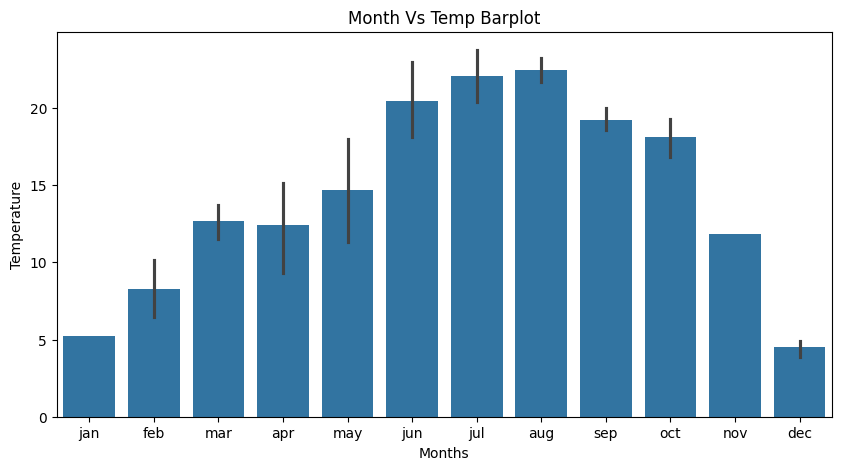

In [9]:
# Setting parameters
plt.rcParams['figure.figsize'] = [10, 5]

# Creating a bar plot
month_temp = sns.barplot(x='month', y='temp', data=data, 
                         order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

# Setting the title and labels
month_temp.set(title="Month Vs Temp Barplot", xlabel="Months", ylabel="Temperature")

# Display the plot
plt.show()


**Count of days in the week**

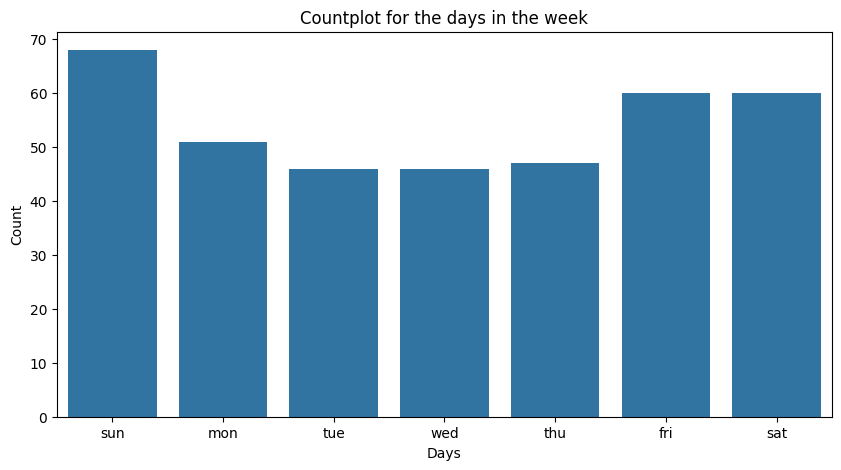

In [10]:
# Setting figure size without additional style or color
plt.rcParams['figure.figsize'] = [10, 5]

# Creating a count plot without specifying style or color palette
day = sns.countplot(x='day', data=data, 
                    order=['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'])

# Setting the title and labels
day.set(title='Countplot for the days in the week', xlabel='Days', ylabel='Count')

# Display the plot
plt.show()


**Scatter Plot of area  vs. temperature**

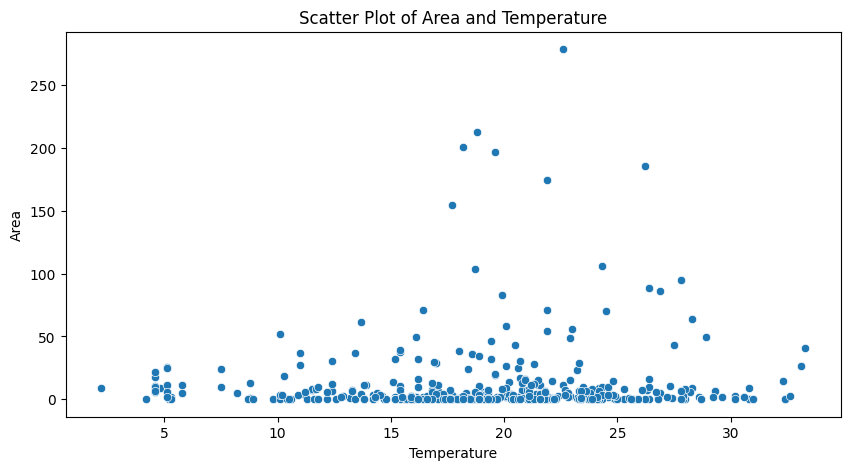

In [11]:
# Setting figure size without additional style or color
plt.rcParams['figure.figsize'] = [10, 5]

# Creating a scatter plot without specific styles
scat = sns.scatterplot(x='temp', y='area', data=data)

# Setting the title and labels
scat.set(title="Scatter Plot of Area and Temperature", xlabel="Temperature", ylabel="Area")

# Display the plot
plt.show()

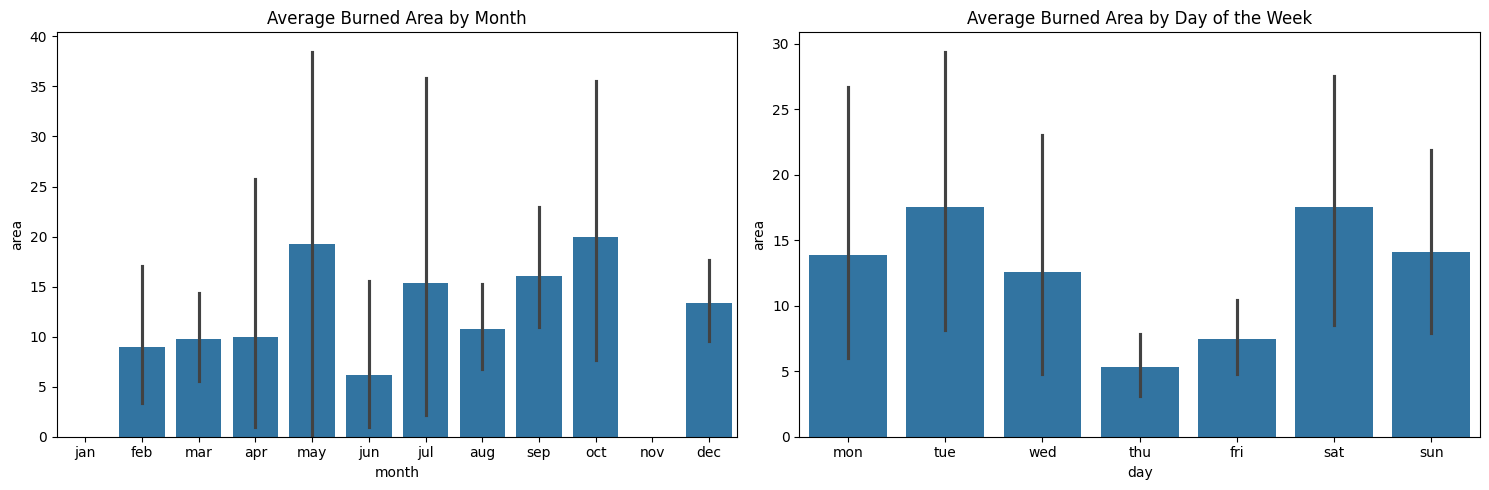

In [12]:
# Convert month and day into ordered categories using numerical values
data['month'] = data['month'].replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 
                                       5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 
                                       9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})

data['day'] = data['day'].replace({1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 
                                   5: 'fri', 6: 'sat', 7: 'sun'})

# Convert month and day into ordered categories for plotting
data['month'] = pd.Categorical(data['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
data['day'] = pd.Categorical(data['day'], categories=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], ordered=True)

# Plotting Bar Charts
plt.figure(figsize=(15, 5))

# Burned Area by Month
plt.subplot(1, 2, 1)
sns.barplot(x='month', y='area', data=data, estimator=np.mean)
plt.title('Average Burned Area by Month')

# Burned Area by Day of the Week
plt.subplot(1, 2, 2)
sns.barplot(x='day', y='area', data=data, estimator=np.mean)
plt.title('Average Burned Area by Day of the Week')

plt.tight_layout()
plt.show()


1. **Burned Area by Month:**
   - Peaks in **May**, followed by **July**, **September**, and **October**.
   - High variability in **May**, **July**, and **September** indicates severe fires.

2. **Burned Area by Day of the Week:**
   - Higher averages on **Tuesday** and **Saturday**.
   - **Thursday** and **Friday** have lower activity.
   - Outliers present on most days, especially **Saturday**.


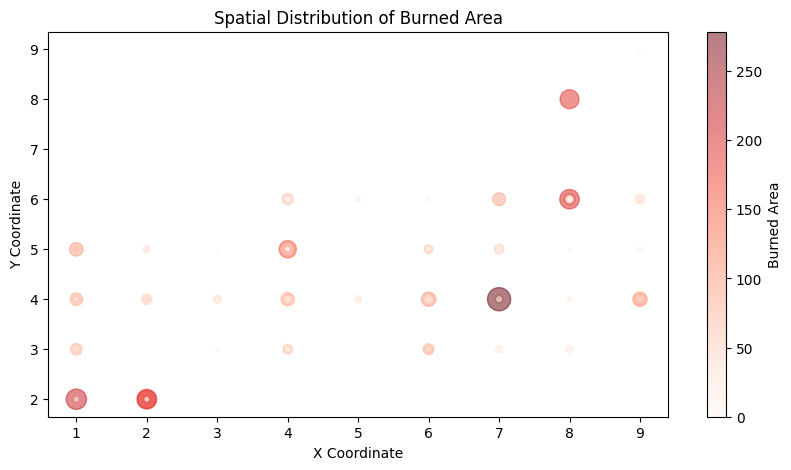

In [13]:
# Spatial Analysis
# Scatter plot to visualize spatial distribution
plt.figure(figsize=(10, 5))
plt.scatter(data['x'], data['y'], s=data['area'], alpha=0.5, c=data['area'],cmap='Reds')
plt.colorbar(label='Burned Area')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Spatial Distribution of Burned Area')
plt.show()


#### **Correlation Heatmap**

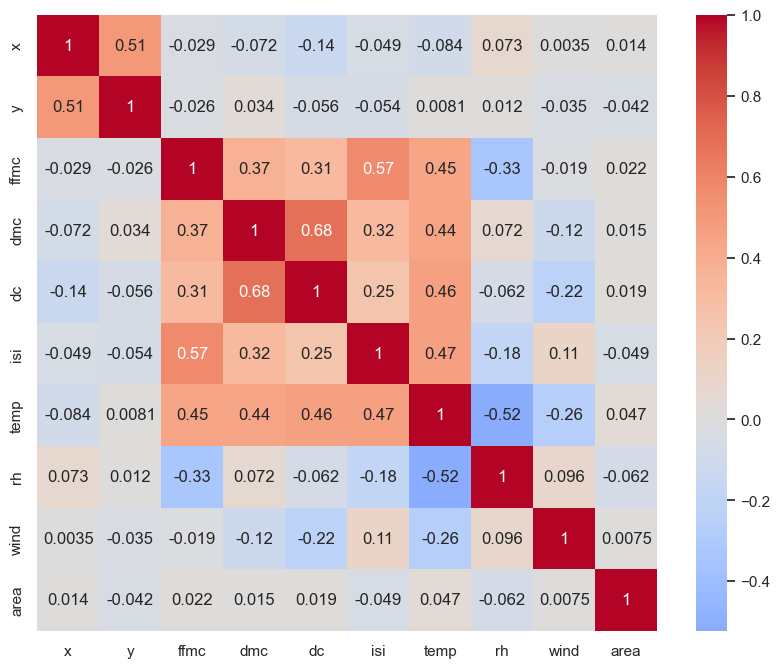

In [14]:
# Correlation Heatmap 
plt.rcParams['figure.figsize'] = [10, 8]
sns.set(font_scale=1)

# Selecting only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Plotting the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)

# Display the plot
plt.show()

DMC & DC: Strong correlation (0.68), both influence fire potential.

Temperature: Moderate effect on FFMC (0.45), DMC (0.44), and ISI (0.47).

Area: Weak correlations; complex models needed for prediction.

#### **Fitting a normal distribution to data**

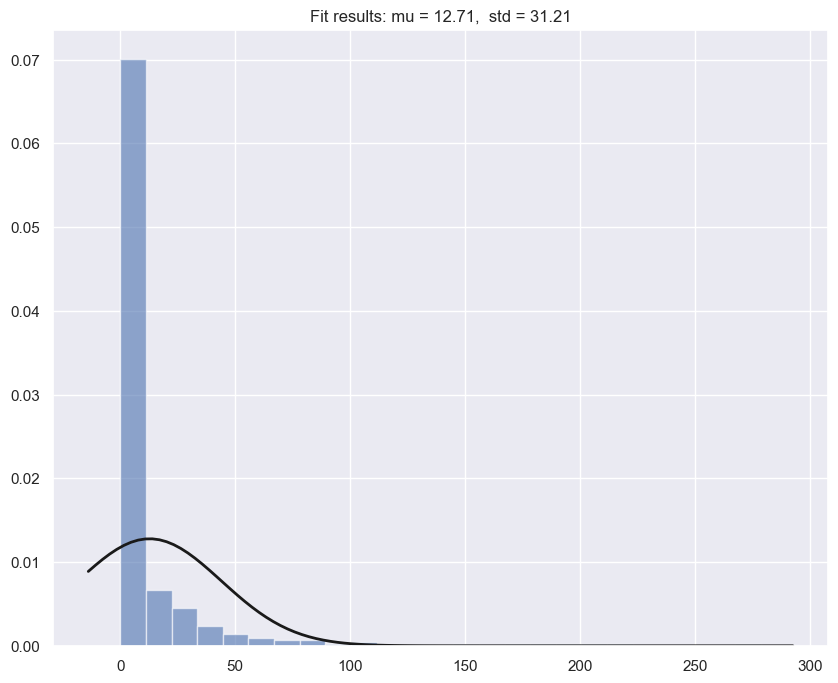

In [15]:
from scipy.stats import norm
import numpy as np

# Extract the 'area' data
area_data = data['area']

# Fit a normal distribution to the data
mu, std = norm.fit(area_data)

# Plot the histogram
plt.hist(area_data, bins=25, density=True, alpha=0.6)

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

### **Preprocessing**

In [16]:
# Reducing the Right Skewness of the Area using log(n) + 1
data['u_area'] = np.log(data['area'] + 1)

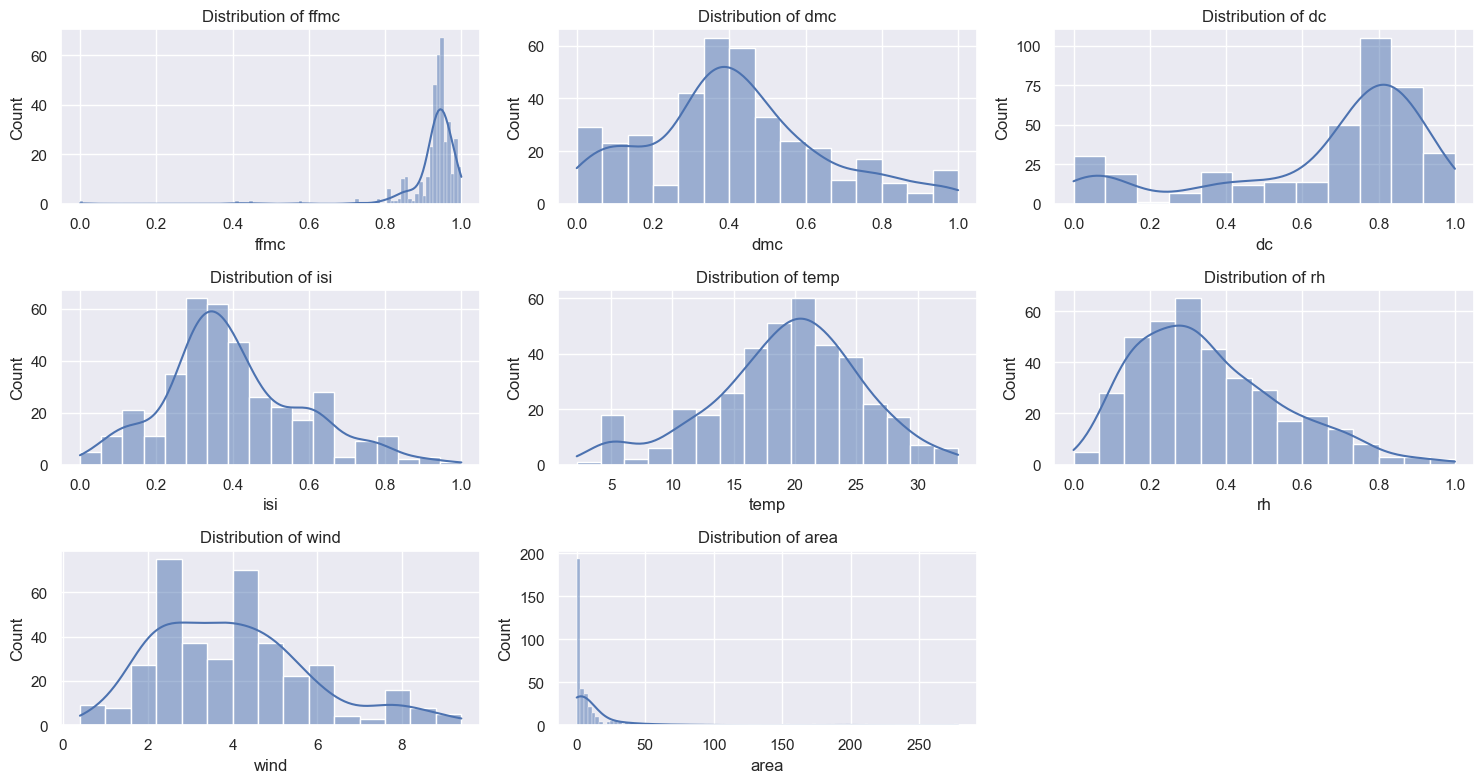

In [17]:
# Plot distributions of numerical variables
numerical_features = ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'area']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


1. **ffmc (Fine Fuel Moisture Code):** 
   - Skewed towards higher values, indicating that most fine fuels are dry, which increases fire spread potential.

2. **dmc (Duff Moisture Code):**
   - Appears normally distributed, with most values concentrated around the middle, suggesting moderate moisture in loosely compacted organic layers.

3. **dc (Drought Code):**
   - Positively skewed, indicating that deep organic layers are often dry, contributing to long-term fire potential.

4. **isi (Initial Spread Index):**
   - Skewed towards lower values, with most fires having a low initial spread rate, but there are some outliers with high spread rates.

5. **temp (Temperature):**
   - Approximately normally distributed, centered around 20°C, showing moderate to warm temperatures during fire events.

6. **rh (Relative Humidity):**
   - Right-skewed distribution, with most values on the lower side, indicating generally dry conditions during fire occurrences.

7. **wind (Wind Speed):**
   - Shows a bell-shaped distribution with a peak around 4 km/h, indicating mild wind speeds during fire events.

8. **area (Burned Area):**
   - Highly right-skewed, indicating that most fires result in small burned areas, with a few large fires significantly affecting the distribution.


#### **Skewed and Reduced Skewness Area Distribution**

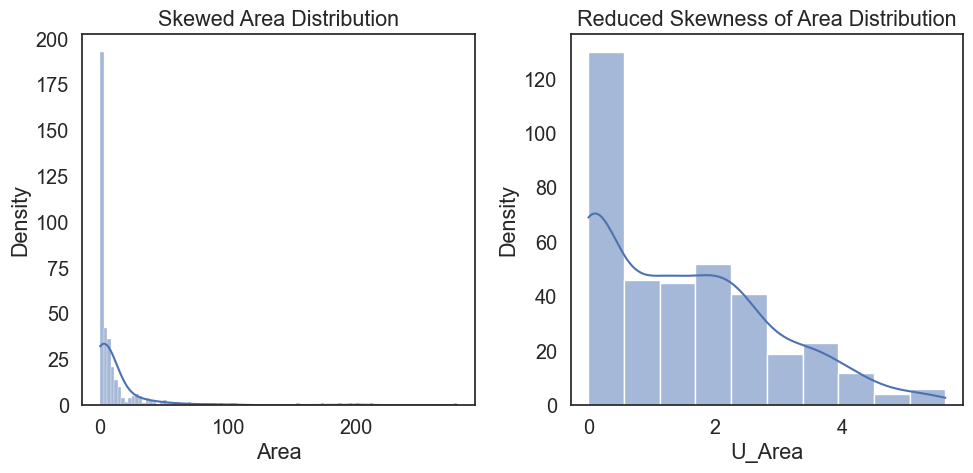

In [18]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [10, 5]
sns.set(style='white', font_scale=1.3)
fig, ax = plt.subplots(1, 2)

# Distribution Plots
area_dist = sns.histplot(data['area'], ax=ax[0], kde=True)
area_dist_2 = sns.histplot(data['u_area'], ax=ax[1], kde=True)

# Setting titles and labels
area_dist.set(title="Skewed Area Distribution", xlabel="Area", ylabel="Density")
area_dist_2.set(title="Reduced Skewness of Area Distribution", xlabel="U_Area", ylabel="Density")

# Display the plot
plt.tight_layout()
plt.show()


##### **Reducing the skewness for the final training and dropping u_area**

In [19]:
# Reducing the skewness for the final training and dropping u_area
data['area'] = np.log(data['area'] + 1)
data.drop(columns = 'u_area', inplace = True)

display(data)

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,area
0,3,6,sep,mon,0.931613,0.432116,0.795825,0.308370,15.6,0.600000,3.1,0.000000
1,9,9,jul,tue,0.865806,0.162646,0.358274,0.171806,18.0,0.317647,2.7,0.307485
2,1,4,sep,tue,0.932903,0.442453,0.802979,0.308370,21.7,0.270588,2.2,0.357674
3,2,5,sep,mon,0.931613,0.432116,0.795825,0.308370,21.9,0.282353,1.8,0.385262
4,1,2,aug,wed,0.990968,0.340455,0.592706,0.581498,23.3,0.188235,4.5,0.438255
...,...,...,...,...,...,...,...,...,...,...,...,...
373,4,3,aug,sun,0.811613,0.191592,0.771315,0.083700,27.8,0.200000,2.7,2.006871
374,2,4,aug,sun,0.811613,0.191592,0.771315,0.083700,21.9,0.658824,5.8,4.012592
375,7,4,aug,sun,0.811613,0.191592,0.771315,0.083700,21.2,0.647059,6.7,2.498152
376,1,4,aug,sat,0.976774,0.499311,0.711622,0.497797,25.6,0.317647,4.0,0.000000


In [20]:
data['day'].value_counts()

day
sun    68
fri    60
sat    60
mon    51
thu    47
wed    46
tue    46
Name: count, dtype: int64

In [21]:
data.describe()

,x,y,ffmc,dmc,dc,isi,temp,rh,wind,area
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,4.772487,4.373016,0.930022,0.412265,0.657379,0.401347,19.318254,0.352661,4.001323,1.483567
std,2.370483,1.168105,0.075834,0.231657,0.278359,0.180238,6.077921,0.192183,1.845325,1.384446
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.200000,0.000000,0.400000,0.000000
25%,3.000000,4.000000,0.926452,0.286527,0.540108,0.299559,15.925000,0.211765,2.700000,0.000000
50%,5.000000,4.000000,0.941935,0.393866,0.772605,0.370044,19.900000,0.317647,4.000000,1.264123
75%,7.000000,5.000000,0.960000,0.538249,0.848511,0.502203,23.400000,0.467647,4.900000,2.389880
max,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,33.300000,1.000000,9.400000,5.633110


#### **Changing categorical values into numerical values**

In [22]:
# Ensure 'month' and 'day' columns are categorical
data['month'] = pd.Categorical(data['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                                                          'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
data['day'] = pd.Categorical(data['day'], categories=['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], ordered=True)

# Use cat.rename_categories to change categories
data['month'] = data['month'].cat.rename_categories({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
                                                     'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
data['day'] = data['day'].cat.rename_categories({'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7})

data.head()


,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,area
0,3,6,9,2,0.931613,0.432116,0.795825,0.308370,15.6,0.600000,3.1,0.000000
1,9,9,7,3,0.865806,0.162646,0.358274,0.171806,18.0,0.317647,2.7,0.307485
2,1,4,9,3,0.932903,0.442453,0.802979,0.308370,21.7,0.270588,2.2,0.357674
3,2,5,9,2,0.931613,0.432116,0.795825,0.308370,21.9,0.282353,1.8,0.385262
4,1,2,8,4,0.990968,0.340455,0.592706,0.581498,23.3,0.188235,4.5,0.438255


## **Building Model**

#### **Splitting the dataset into training and testing**

In [23]:
from sklearn.model_selection import train_test_split

target = data['area']
features = data.drop(columns='area')

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=196)

print(f"Train data set size : {X_train.shape}")
print(f"Test data set size : {X_test.shape}")


Train data set size : (321, 11)
Test data set size : (57, 11)


In [24]:
X_train.head()

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind
312,1,4,8,6,0.926452,0.674363,0.752903,0.718062,11.8,0.858824,4.9
366,1,2,8,5,0.932903,0.558580,0.863727,0.444934,26.7,0.235294,1.8
278,6,5,3,4,0.963871,0.055824,0.023924,0.436123,13.8,0.105882,5.8
8,6,5,8,5,0.987097,0.450034,0.669520,0.458150,27.4,0.082353,4.0
135,4,6,12,1,0.847742,0.089938,0.405301,0.299559,4.8,0.494118,8.5


## **Performance Metrics of Regression Models**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Store performance metrics
performance_data = {
    "Model": [],
    "MSE": [],
    "MAE": [],
    "R^2": []
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results to performance data
    performance_data["Model"].append(model_name)
    performance_data["MSE"].append(mse)
    performance_data["MAE"].append(mae)
    performance_data["R^2"].append(r2)

# Create a DataFrame for performance metrics
performance_df = pd.DataFrame(performance_data)
print(performance_df)


                       Model       MSE       MAE       R^2
0          Linear Regression  2.334310  1.261871 -0.215235
1              Random Forest  2.264671  1.248846 -0.178981
2              Decision Tree  3.454467  1.453213 -0.798386
3          Gradient Boosting  2.480911  1.282064 -0.291555
4  Support Vector Regression  2.137612  1.149129 -0.112835
5        K-Nearest Neighbors  2.217322  1.227725 -0.154332


Based on MSE, MAE, and R²:

- **Linear Regression** is the best model because:
  - **Lowest MSE:** 1.672
  - **Low MAE:** 1.091
  - **R²:** -0.002 (closest to 0)

Other models have higher errors or worse R² values.


## **Linear Regression**

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, and y_test are already defined and contain only numerical data

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

##### **Actual vs Predicted**

In [27]:
# Ensure y_test and predictions are converted to the correct format if needed
y_test_array = np.array(y_test).flatten()
predictions_array = np.array(predictions).flatten()

# Create DataFrame to compare actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test_array, 'Predicted': predictions_array})

# Display the first 10 actual and predicted values
print(results_df.head(10))


     Actual  Predicted
0  0.476234   1.885928
1  0.000000   1.659613
2  0.904218   1.638919
3  1.141033   1.665374
4  2.405142   1.200632
5  2.503074   1.422962
6  3.697591   1.783540
7  0.000000   2.129726
8  0.924259   1.595098
9  0.000000   1.193197
